# Data preprocessing

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd


In [2]:
#importing dataset
df = pd.read_csv('employee_data.csv')

df.head()

,City,Age,Salary,Eligible for bonus
0,Mumbai,27.0,51000.0,Yes
1,NewYork,27.0,48000.0,Yes
2,Mumbai,30.0,52000.0,No
3,NewYork,NaN,66000.0,No
4,Tokyo,48.0,NaN,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                17 non-null     object 
 1   Age                 14 non-null     float64
 2   Salary              15 non-null     float64
 3   Eligible for bonus  17 non-null     object 
dtypes: float64(2), object(2)
memory usage: 672.0+ bytes


# Creating dependent and independent variables

In [4]:
# create numpy representaion of the data

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
X

array([['Mumbai', 27.0, 51000.0],
       ['NewYork', 27.0, 48000.0],
       ['Mumbai', 30.0, 52000.0],
       ['NewYork', nan, 66000.0],
       ['Tokyo', 48.0, nan],
       ['Tokyo', nan, 51000.0],
       ['Singapore', 33.0, 69000.0],
       ['NewYork', 40.0, 79000.0],
       ['Mumbai', 38.0, nan],
       ['Singapore', 35.0, 38000.0],
       ['Tokyo', nan, 56000.0],
       ['Singapore', 35.0, 72000.0],
       ['NewYork', 45.0, 79000.0],
       ['Mumbai', 31.0, 85000.0],
       ['Singapore', 37.0, 49000.0],
       ['Mumbai', 69.0, 110000.0],
       ['Tokyo', 16.0, 40000.0]], dtype=object)

In [6]:
y

array(['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'], dtype=object)

### Handling Missing Values

In [7]:
# counting the number of missing values
df.isnull().sum()

City                  0
Age                   3
Salary                2
Eligible for bonus    0
dtype: int64

In [9]:
# dropping missing value records
df1 = df.dropna()
df1.isnull().sum()

City                  0
Age                   0
Salary                0
Eligible for bonus    0
dtype: int64

In [11]:
# replacing missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [12]:
X

array([['Mumbai', 27.0, 51000.0],
       ['NewYork', 27.0, 48000.0],
       ['Mumbai', 30.0, 52000.0],
       ['NewYork', 36.5, 66000.0],
       ['Tokyo', 48.0, 63000.0],
       ['Tokyo', 36.5, 51000.0],
       ['Singapore', 33.0, 69000.0],
       ['NewYork', 40.0, 79000.0],
       ['Mumbai', 38.0, 63000.0],
       ['Singapore', 35.0, 38000.0],
       ['Tokyo', 36.5, 56000.0],
       ['Singapore', 35.0, 72000.0],
       ['NewYork', 45.0, 79000.0],
       ['Mumbai', 31.0, 85000.0],
       ['Singapore', 37.0, 49000.0],
       ['Mumbai', 69.0, 110000.0],
       ['Tokyo', 16.0, 40000.0]], dtype=object)

### Data encoding

In [13]:
# one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
X

array([[1.0, 0.0, 0.0, 0.0, 27.0, 51000.0],
       [0.0, 1.0, 0.0, 0.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 0.0, 30.0, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 36.5, 66000.0],
       [0.0, 0.0, 0.0, 1.0, 48.0, 63000.0],
       [0.0, 0.0, 0.0, 1.0, 36.5, 51000.0],
       [0.0, 0.0, 1.0, 0.0, 33.0, 69000.0],
       [0.0, 1.0, 0.0, 0.0, 40.0, 79000.0],
       [1.0, 0.0, 0.0, 0.0, 38.0, 63000.0],
       [0.0, 0.0, 1.0, 0.0, 35.0, 38000.0],
       [0.0, 0.0, 0.0, 1.0, 36.5, 56000.0],
       [0.0, 0.0, 1.0, 0.0, 35.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 45.0, 79000.0],
       [1.0, 0.0, 0.0, 0.0, 31.0, 85000.0],
       [0.0, 0.0, 1.0, 0.0, 37.0, 49000.0],
       [1.0, 0.0, 0.0, 0.0, 69.0, 110000.0],
       [0.0, 0.0, 0.0, 1.0, 16.0, 40000.0]], dtype=object)

In [15]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(y)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

### Split the dataset for training and testing

In [16]:
# train/test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
X_train

array([[0.0, 0.0, 0.0, 1.0, 36.5, 56000.0],
       [0.0, 0.0, 0.0, 1.0, 48.0, 63000.0],
       [0.0, 1.0, 0.0, 0.0, 27.0, 48000.0],
       [0.0, 0.0, 1.0, 0.0, 37.0, 49000.0],
       [1.0, 0.0, 0.0, 0.0, 27.0, 51000.0],
       [0.0, 0.0, 0.0, 1.0, 16.0, 40000.0],
       [1.0, 0.0, 0.0, 0.0, 69.0, 110000.0],
       [0.0, 0.0, 1.0, 0.0, 35.0, 38000.0],
       [1.0, 0.0, 0.0, 0.0, 38.0, 63000.0],
       [0.0, 1.0, 0.0, 0.0, 45.0, 79000.0],
       [0.0, 0.0, 1.0, 0.0, 35.0, 72000.0],
       [0.0, 0.0, 0.0, 1.0, 36.5, 51000.0]], dtype=object)

In [18]:
X_test

array([[0.0, 1.0, 0.0, 0.0, 36.5, 66000.0],
       [1.0, 0.0, 0.0, 0.0, 31.0, 85000.0],
       [0.0, 1.0, 0.0, 0.0, 40.0, 79000.0],
       [1.0, 0.0, 0.0, 0.0, 30.0, 52000.0],
       [0.0, 0.0, 1.0, 0.0, 33.0, 69000.0]], dtype=object)

In [19]:
y_train

array(['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No'], dtype=object)

In [20]:
y_test

array(['No', 'Yes', 'Yes', 'No', 'No'], dtype=object)

### Feature Scaling

In [21]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[:, 4:] = scaler.fit_transform(X_train[:, 4:])
X_test[:, 4:] = scaler.fit_transform(X_test[:, 4:])

In [22]:
X_train

array([[0.0, 0.0, 0.0, 1.0, -0.08039761142244642, -0.2100902925755561],
       [0.0, 0.0, 0.0, 1.0, 0.8441749199356875, 0.15756771943166706],
       [0.0, 1.0, 0.0, 0.0, -0.8441749199356875, -0.6302708777266682],
       [0.0, 0.0, 1.0, 0.0, -0.04019880571122321, -0.5777483045827793],
       [1.0, 0.0, 0.0, 0.0, -0.8441749199356875, -0.4727031582950012],
       [0.0, 0.0, 0.0, 1.0, -1.728548645582598, -1.0504514628777806],
       [1.0, 0.0, 0.0, 0.0, 2.532524759807062, 2.6261286571944513],
       [0.0, 0.0, 1.0, 0.0, -0.20099402855611606, -1.1554966091655585],
       [1.0, 0.0, 0.0, 0.0, 0.04019880571122321, 0.15756771943166706],
       [0.0, 1.0, 0.0, 0.0, 0.6029820856683482, 0.9979288897338915],
       [0.0, 0.0, 1.0, 0.0, -0.20099402855611606, 0.6302708777266682],
       [0.0, 0.0, 0.0, 1.0, -0.08039761142244642, -0.4727031582950012]],
      dtype=object)

In [23]:
X_test

array([[0.0, 1.0, 0.0, 0.0, 0.6498364332886585, -0.3692744729379982],
       [1.0, 0.0, 0.0, 0.0, -0.839372059664518, 1.3012529046386603],
       [0.0, 1.0, 0.0, 0.0, 1.5975145651679525, 0.773717943298663],
       [1.0, 0.0, 0.0, 0.0, -1.110137240201459, -1.6001893827313256],
       [0.0, 0.0, 1.0, 0.0, -0.2978416985906357, -0.10550699226799949]],
      dtype=object)

### Outlier Treatment

In [24]:
import matplotlib.pyplot as plt

dataset = pd.read_csv('employee_data.csv')
dataset.head()

,City,Age,Salary,Eligible for bonus
0,Mumbai,27.0,51000.0,Yes
1,NewYork,27.0,48000.0,Yes
2,Mumbai,30.0,52000.0,No
3,NewYork,NaN,66000.0,No
4,Tokyo,48.0,NaN,Yes


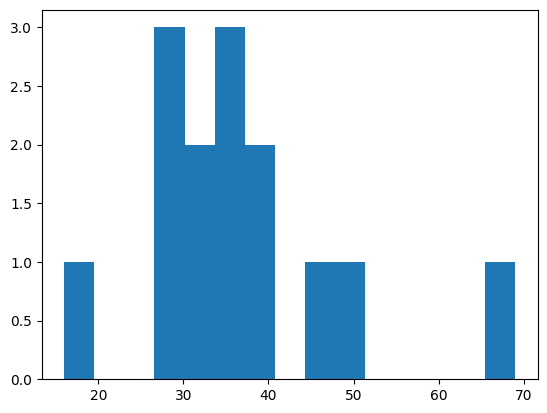

In [30]:
# finding the outliers

plt.hist(dataset['Age'], bins=15)
plt.show()

In [32]:
# detecting outlier with Quantile

lowerLimit = dataset['Age'].quantile(0.05)
upperLimit = dataset['Age'].quantile(0.95)

In [33]:
print('Upper Limit = ', upperLimit)
print('Lower Limit = ', lowerLimit)

Upper Limit =  55.349999999999994
Lower Limit =  23.15


In [41]:
# printing the outliers
dataset[(dataset['Age'] < lowerLimit) | (dataset['Age'] > upperLimit)]

,City,Age,Salary,Eligible for bonus
15,Mumbai,69.0,110000.0,No
16,Tokyo,16.0,40000.0,Yes


In [43]:
dataset = dataset[(dataset.Age > lowerLimit) & (dataset.Age < upperLimit)]
dataset

,City,Age,Salary,Eligible for bonus
0,Mumbai,27.0,51000.0,Yes
1,NewYork,27.0,48000.0,Yes
2,Mumbai,30.0,52000.0,No
4,Tokyo,48.0,NaN,Yes
6,Singapore,33.0,69000.0,No
7,NewYork,40.0,79000.0,Yes
8,Mumbai,38.0,NaN,Yes
9,Singapore,35.0,38000.0,No
11,Singapore,35.0,72000.0,No
12,NewYork,45.0,79000.0,Yes
